# Crypto Indicators
Based on the 24 Technical Indicators in this paper

## Imports

In [88]:
import config
import ccxt
import pandas as pd
import pandas_ta as ta
import matplotlib.pyplot as plt

## Fetching OHLCV

In [89]:
exchange = {
        'apiKey': config.KRAKEN_API_KEY,
        'secret': config.KRAKEN_PRIVATE_KEY,
        'enableRateLimit': True
    }
exchange = ccxt.kraken(exchange)

try:
    ohlcv = exchange.fetch_ohlcv(symbol='XRP/USD', timeframe='1d')
except ccxt.BaseError as error:
    print(f"Error Fetching OHLCV: {error}")

df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
df.set_index('timestamp', inplace=True)

In [90]:
df.head()

,open,high,low,close,volume
timestamp,,,,,
2023-06-12,0.52055,0.52795,0.50903,0.52527,6.905383e+06
2023-06-13,0.52565,0.56500,0.50482,0.51926,2.329772e+07
2023-06-14,0.51912,0.52019,0.46141,0.47998,1.316981e+07
2023-06-15,0.48000,0.48511,0.46761,0.47994,7.485971e+06
2023-06-16,0.47970,0.48262,0.45500,0.47549,9.882194e+06


## MACD(9)

In [96]:
df.ta.macd(close=df['close'], fast=12, slow=26, signal=9, append=True)
df.tail()

,open,high,low,close,volume,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
timestamp,,,,,,,,
2025-05-27,2.31088,2.35400,2.27000,2.31900,1.032123e+07,0.019146,-0.019362,0.038508
2025-05-28,2.31901,2.32334,2.22790,2.27492,1.049460e+07,0.011630,-0.021502,0.033133
2025-05-29,2.27492,2.31199,2.23790,2.24520,1.041838e+07,0.003239,-0.023915,0.027154
2025-05-30,2.24519,2.25221,2.13069,2.14044,2.050238e+07,-0.011730,-0.031107,0.019377
2025-05-31,2.14044,2.20685,2.08184,2.18453,1.501709e+07,-0.019807,-0.031347,0.011540


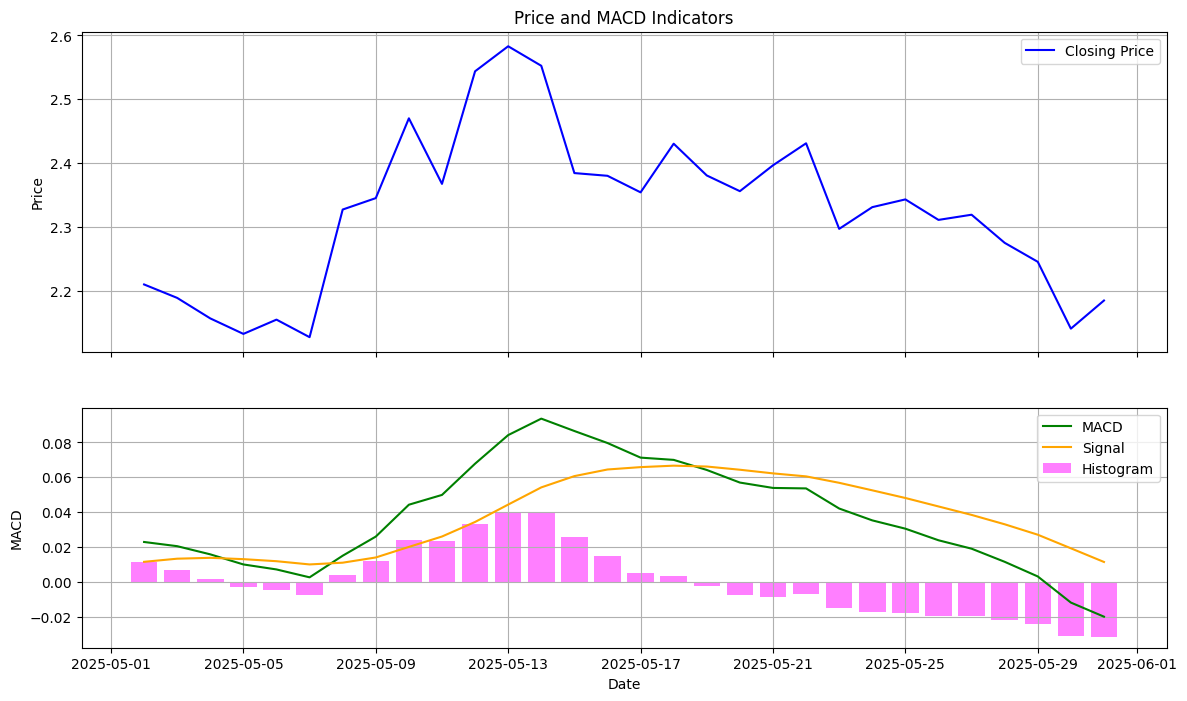

In [102]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True, gridspec_kw={'height_ratios': [2, 1.5]})

# Last 30 days
recent_df = df[df.index >= pd.Timestamp.now() - pd.Timedelta(days=30)]
# Upper
ax1.plot(recent_df.index, recent_df['close'], label='Closing Price', color='blue')
ax1.set_title("Price and MACD Indicators")
ax1.set_ylabel("Price")
ax1.legend()
ax1.grid(True)
# Lower
ax2.plot(recent_df.index, recent_df['MACD_12_26_9'], label='MACD', color='green')
ax2.plot(recent_df.index, recent_df['MACDs_12_26_9'], label='Signal', color='orange')
ax2.bar(recent_df.index, recent_df['MACDh_12_26_9'], label='Histogram', color='magenta', alpha=0.5)
ax2.set_ylabel("MACD")
ax2.set_xlabel("Date")
ax2.legend()
ax2.grid(True)

plt.show()